In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pwd

'/Users/amnon/git/dbbact-paper/notebooks/bird-griffon-carrion-211021'

In [4]:
ca.set_log_level(11)

In [5]:
%matplotlib inline

In [6]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the dataset
From:

The gut microbiome and metabolome of Himalayan Griffons (Gyps himalayensis): insights into the adaptation to carrion-feeding habits in avian scavengers

Wang, W., Gao, X., Zheng, S., Lancuo, Z., Li, Y., Zhu, L., ... & Sharshov, K. (2021)

Avian Research, 12(1), 1-17.

https://doi.org/10.1186/s40657-021-00287-0

In [7]:
dat=ca.read_amplicon('./all.biom','./map.txt',normalize=10000,min_reads=1000)

2022-06-29 16:45:31 INFO loaded 35 samples, 4492 features
2022-06-29 16:45:31 WARNING These have metadata but do not have data - dropped (1): {'SRR14284311'}
2022-06-29 16:45:31 WARNING Do you forget to normalize your data? It is required before running this function
2022-06-29 16:45:31 INFO After filtering, 35 remain.


In [8]:
datc=dat.cluster_features(10)

2022-06-29 16:45:31 INFO After filtering, 1485 remain.


In [9]:
datc=datc.sort_samples('Host')

In [10]:
datc.sample_metadata.Isolation_source.value_counts()

feces    27
skin      8
Name: Isolation_source, dtype: int64

# dbBact term wordcloud (f-scores) for the sequences present in > 30% of samples

2022-06-29 16:45:32 INFO After filtering, 36 remain.
2022-06-29 16:45:32 INFO Getting dbBact annotations for 36 sequences, please wait...
2022-06-29 16:45:34 INFO got 2134 annotations
2022-06-29 16:45:34 INFO Got 4835 annotation-sequence pairs
2022-06-29 16:45:34 INFO Added annotation data to experiment. Total 2134 annotations, 36 ASVs
2022-06-29 16:45:34 INFO Found 1 experiments ([862]) matching current experiment - ignoring them.


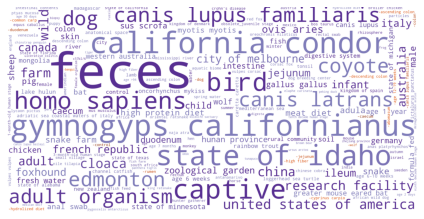

In [11]:
tt=datc.filter_samples('Isolation_source','feces')
tt=tt.filter_prevalence(0.3)
f=db.draw_wordcloud(tt,ignore_exp=True)

In [12]:
f.savefig('./fig-wordcloud.pdf')

# Show the dbBact terms as bar plot instead of wordcloud (using the f-score)

In [13]:
tt=datc.filter_samples('Isolation_source','feces')
tt=tt.filter_prevalence(0.3)
res=db.get_wordcloud_stats(tt,ignore_exp=True)

2022-06-29 16:45:40 INFO After filtering, 36 remain.
2022-06-29 16:45:40 INFO Getting dbBact annotations for 36 sequences, please wait...
2022-06-29 16:45:42 INFO got 2134 annotations
2022-06-29 16:45:42 INFO Got 4835 annotation-sequence pairs
2022-06-29 16:45:42 INFO Added annotation data to experiment. Total 2134 annotations, 36 ASVs
2022-06-29 16:45:42 INFO Found 1 experiments ([862]) matching current experiment - ignoring them.


In [14]:
a=pd.DataFrame.from_dict(res[0],orient='index')

In [15]:
a=a.sort_values(0, ascending=False)

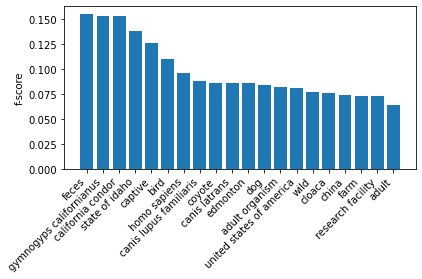

In [22]:
f=plt.figure()
plt.bar(np.arange(20),a[0].values[:20])
aa=plt.gca()
aa.set_xticks(np.arange(20))
_=aa.set_xticklabels(a.index.values[:20],rotation=45,ha="right")
plt.ylabel('f-score')
plt.tight_layout()

In [23]:
f.savefig('./fig-barplot-terms.pdf')

# Plot the fraction of griffon sequences associated with each term

In [24]:
def get_num_seqs_term(exp, term):
    tdb = exp.databases['dbbact']
    num_match=0
    for cseq in exp.feature_metadata.index.values:
        if cseq not in tdb['sequence_terms']:
            print('missing')
            continue
        cterms = tdb['sequence_terms'][cseq]
        if term in cterms:
            num_match += 1
    print('term %s: %d / %d' % (term, num_match, len(exp.feature_metadata)))
    return num_match / len(exp.feature_metadata)

term feces: 33 / 36
term gymnogyps californianus: 21 / 36
term california condor: 21 / 36
term state of idaho: 21 / 36
term captive: 24 / 36
term bird: 33 / 36
term homo sapiens: 19 / 36
term canis lupus familiaris: 17 / 36
term coyote: 12 / 36
term canis latrans: 12 / 36
term edmonton: 12 / 36
term dog: 17 / 36
term adult organism: 18 / 36
term united states of america: 22 / 36
term wild: 17 / 36
term cloaca: 19 / 36
term china: 32 / 36
term farm: 21 / 36
term research facility: 23 / 36
term adult: 18 / 36


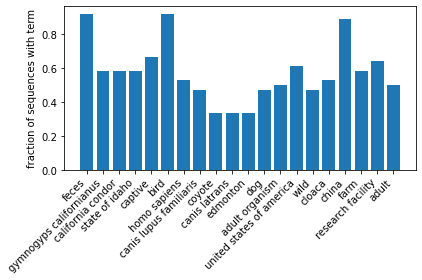

In [26]:
nums = []
for cterm in a.index.values[:20]:
    nums.append(get_num_seqs_term(tt,cterm))
f=plt.figure()
plt.bar(np.arange(len(nums)),nums)
plt.ylabel('fraction of sequences with term')
aa=plt.gca()
aa.set_xticks(np.arange(len(nums)))
aa.set_xticklabels(a.index.values[:20],rotation=45,ha="right")
pass
plt.tight_layout()

In [27]:
f.savefig('./fig-terms-fraction.pdf')

In [30]:
cu.splot(datc,'Isolation_source',barx_fields=['Host'])

/Users/amnon/git/calour/calour/heatmap/heatmap.py:308: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(bad_color)
